<a href="https://colab.research.google.com/github/KeshavAman/Flower-Prediction-using-Unsupervised-Machine-Learning/blob/main/Flower_prediction_Unsupervised_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing the Libraries**

In [124]:
import numpy as np
import pandas as pd
from pandas import plotting
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the Dataset**

In [125]:
dataset = pd.read_csv('https://raw.githubusercontent.com/KeshavAman/Flower-Prediction-using-Unsupervised-Machine-Learning/main/Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [127]:
dataset.shape

(150, 6)

**Checking if there is any NULL data**

In [128]:
dataset.isnull().any().any()

False

**Data Visualization**

***Andrews Curve***

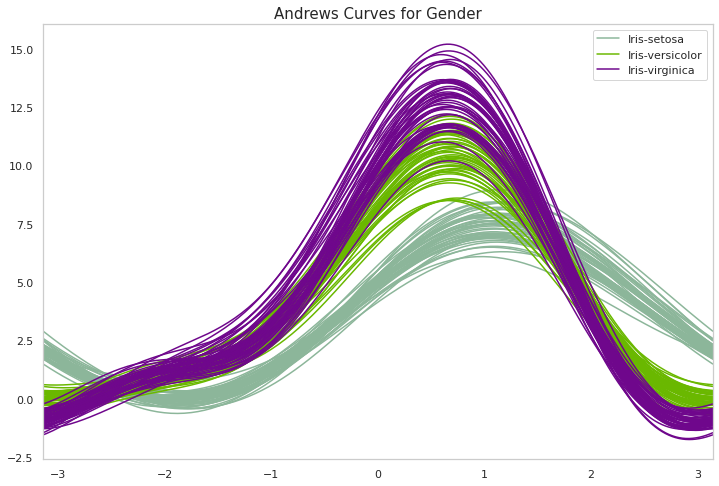

In [129]:
fig = plt.figure(figsize = (12,8))

plotting.andrews_curves(dataset.drop('Id', axis = 1), 'Species')
plt.title('Andrews Curves for Gender', fontsize = 15)
plt.show()

***Distplot Sepal Length and Petal Length***

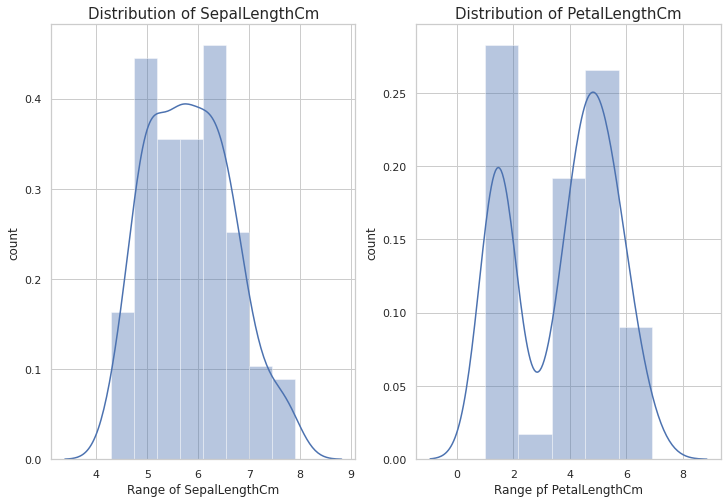

In [130]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize = (12,8))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['SepalLengthCm'])
plt.title('Distribution of SepalLengthCm', fontsize = 15)
plt.xlabel('Range of SepalLengthCm')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.set(style = 'whitegrid')
sns.distplot(dataset['PetalLengthCm'])
plt.title('Distribution of PetalLengthCm', fontsize = 15)
plt.xlabel('Range pf PetalLengthCm')
plt.ylabel('count')
plt.show()

***Distplot Sepal Width and Petal Width***

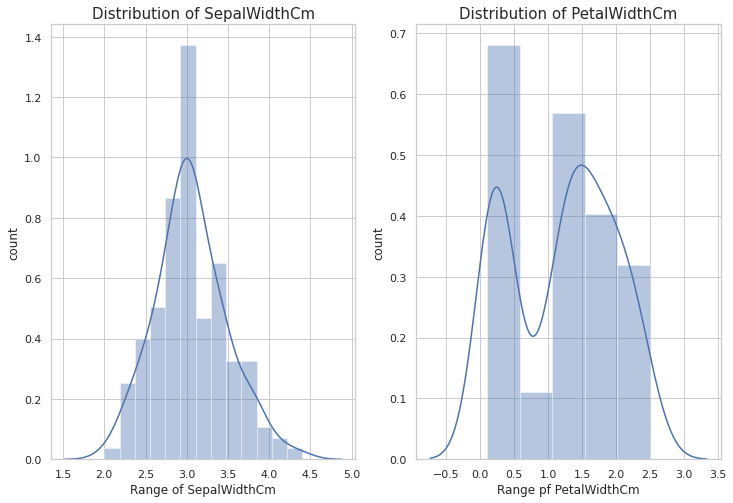

In [131]:
fig = plt.figure(figsize = (12,8))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['SepalWidthCm'])
plt.title('Distribution of SepalWidthCm', fontsize = 15)
plt.xlabel('Range of SepalWidthCm')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.set(style = 'whitegrid')
sns.distplot(dataset['PetalWidthCm'])
plt.title('Distribution of PetalWidthCm', fontsize = 15)
plt.xlabel('Range pf PetalWidthCm')
plt.ylabel('count')
plt.show()

**Pie Chart**

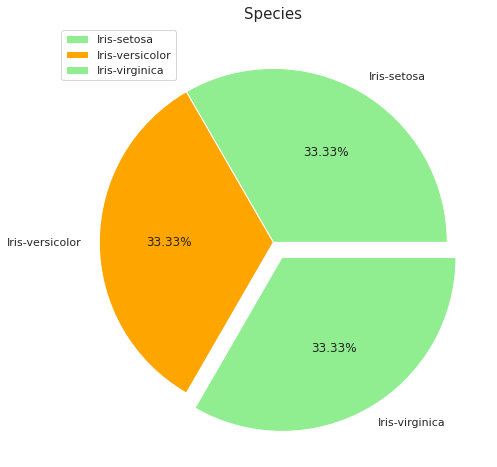

In [132]:
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica']
size = dataset['Species'].value_counts()
colors = ['lightgreen','orange']
explode = [0, 0, 0.1]

fig = plt.figure(figsize = (8,8))
plt.pie(size , labels = labels, explode= explode, colors = colors, autopct = '%.2f%%')
plt.title('Species', fontsize = 15)
plt.legend()
plt.show()

***Pair Plot***

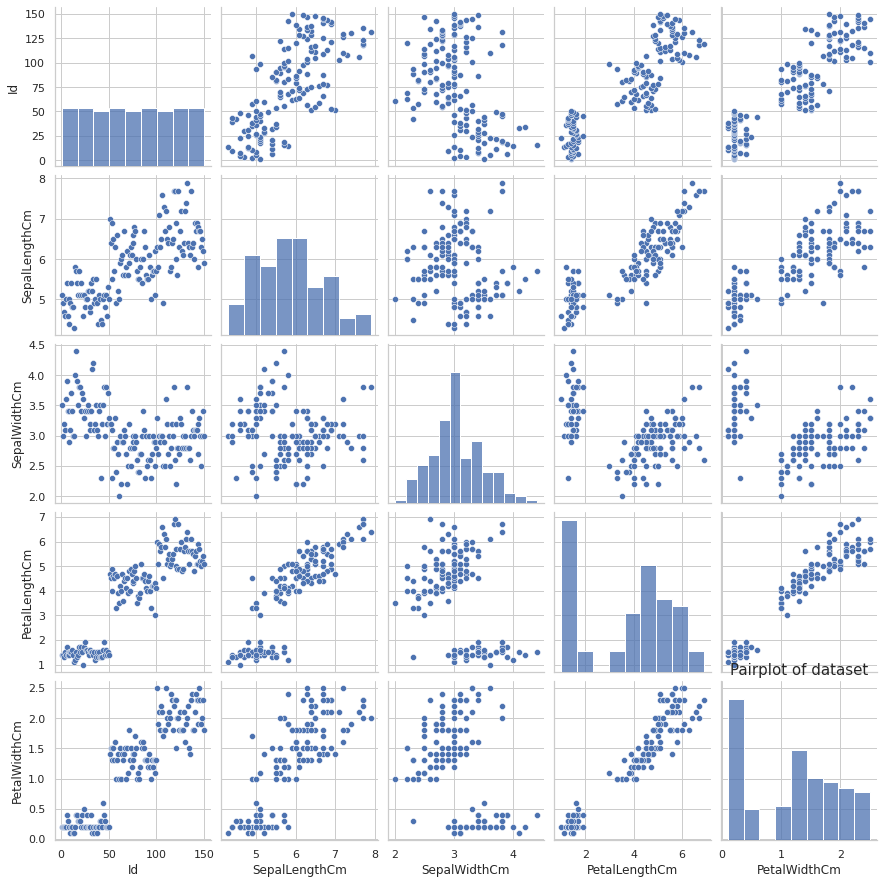

In [133]:
sns.pairplot(dataset)
plt.title('Pairplot of dataset', fontsize = 15)
plt.show()

***Heatmap***

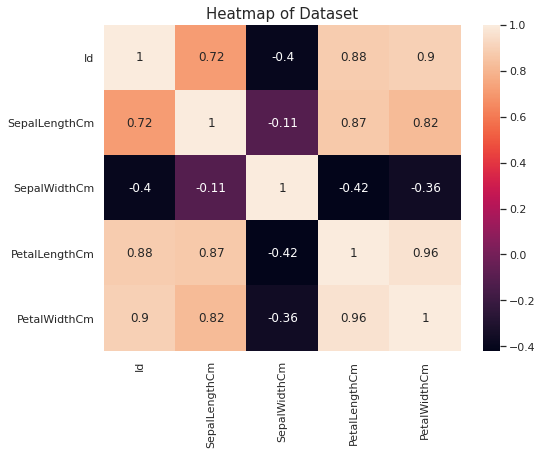

In [134]:
fig = plt.figure(figsize= (8,6))
sns.heatmap(dataset.corr(), annot= True)
plt.title('Heatmap of Dataset', fontsize= 15)
plt.show()

***Boxenplot Species vs Petal Length***

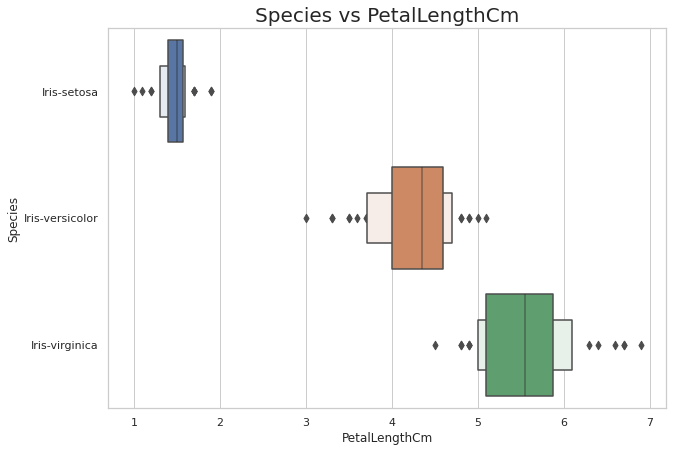

In [144]:
plt.figure(figsize = (10,7))
sns.boxenplot(dataset['PetalLengthCm'], dataset['Species'])
plt.title('Species vs PetalLengthCm', fontsize = 20)
plt.show()

***Boxenplot Species vs Sepal Length***

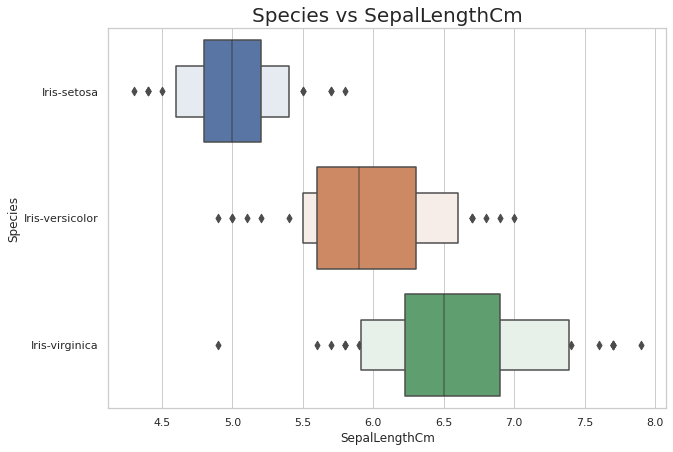

In [136]:
plt.figure(figsize = (10,7))
sns.boxenplot(dataset['SepalLengthCm'], dataset['Species'])
plt.title('Species vs SepalLengthCm', fontsize = 20)
plt.show()

***Lineplot Species vs PetalLength and SepalLength***

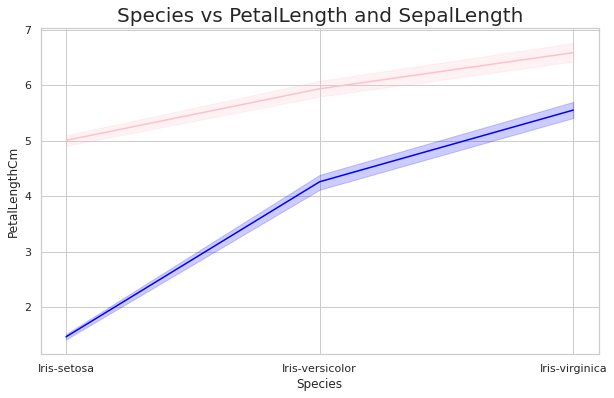

In [137]:
plt.figure(figsize = (10,6))
x = dataset['Species']
y = dataset['PetalLengthCm']
z = dataset['SepalLengthCm']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Species vs PetalLength and SepalLength', fontsize = 20)
plt.show()

***Lineplot Species vs PetalWidth and SepalWidth***

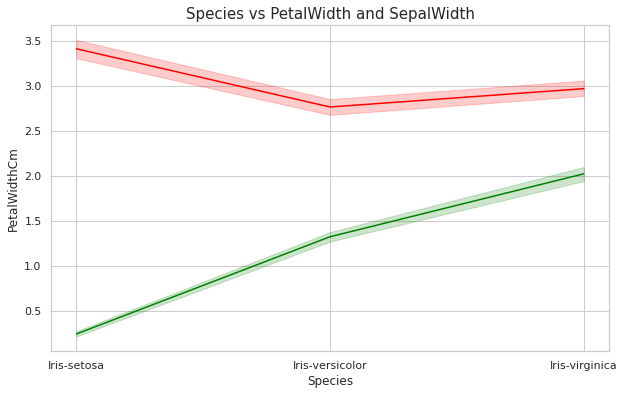

In [138]:
plt.figure(figsize = (10,6))
x = dataset['Species']
y = dataset['PetalWidthCm']
z = dataset['SepalWidthCm']

sns.lineplot(x, y, color = 'green')
sns.lineplot(x, z, color = 'red')
plt.title('Species vs PetalWidth and SepalWidth', fontsize = 15)
plt.show()

***3D Scatter Plot***

In [146]:
import plotly.express as px

fig = px.scatter_3d(dataset, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',
              color='Species')
fig.show()

In [143]:
import plotly.express as px

fig = px.scatter_3d(dataset, x='PetalLengthCm', y='PetalWidthCm', z='SepalWidthCm',
              color='Species')
fig.show()

**Preprocesing of Dataset**

In [112]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataset['Species'] = label.fit_transform(dataset['Species'])

**Splitting of Dataset**

In [113]:
x = dataset.iloc[:, [2,4,-1]].values
x.shape

(150, 3)

**Using KMeans Clustering on Sepal Length and Petal Length** 

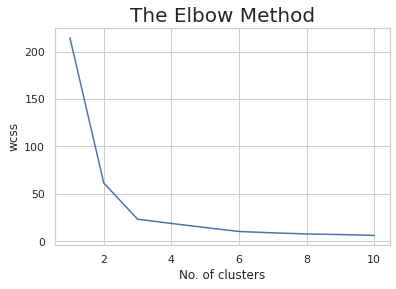

In [114]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

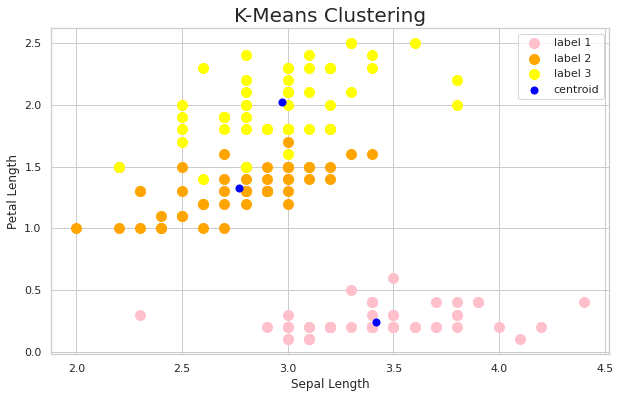

In [115]:
plt.figure(figsize = (10,6))
km = km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 100, c = 'pink', label = 'label 1')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 100, c = 'orange', label = 'label 2')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 100, c = 'yellow', label = 'label 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'blue', label = 'centroid')
plt.title('K-Means Clustering', fontsize = 20)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

**Using Hierarchical on Sepal Length and Petal Length**

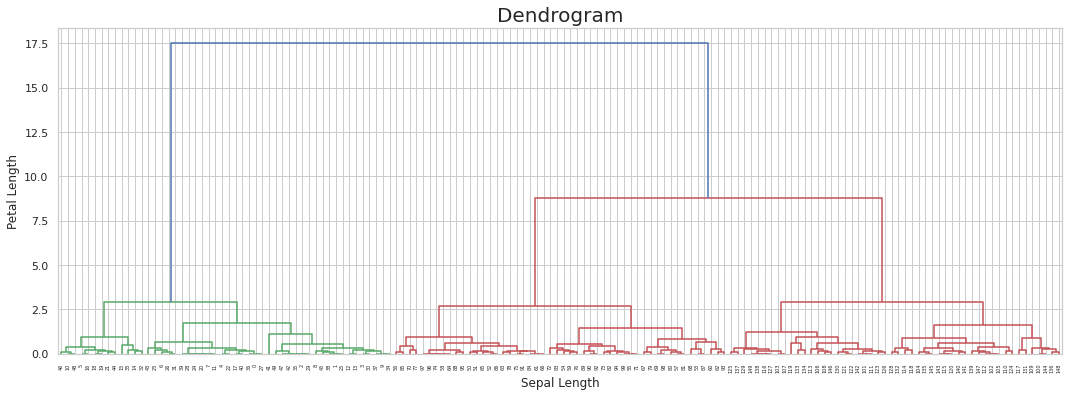

In [116]:
from scipy.cluster import hierarchy as sch

plt.figure(figsize = (18,6))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

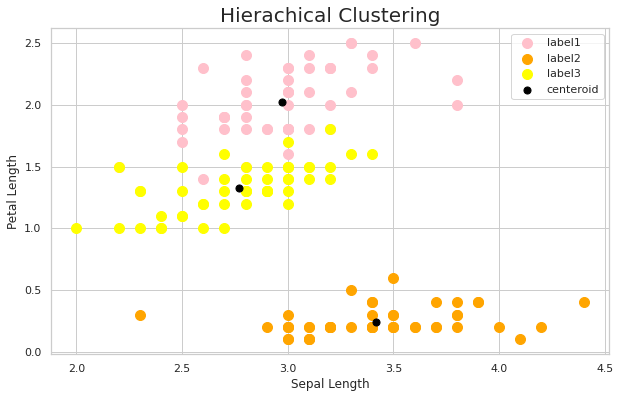

In [117]:
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize = (10,6))
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s = 100, c = 'pink', label = 'label1')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s = 100, c = 'orange', label = 'label2')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s = 100, c = 'yellow', label = 'label3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'black', label = 'centeroid')
plt.title('Hierachical Clustering', fontsize = 20)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

**Splitting of Dataset**

In [118]:
x = dataset.iloc[:,[3,5,-1]].values
x.shape

(150, 3)

**Using KMeans Clustering on Sepal Width and Petal Width**

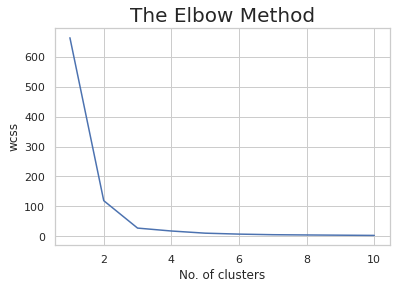

In [119]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

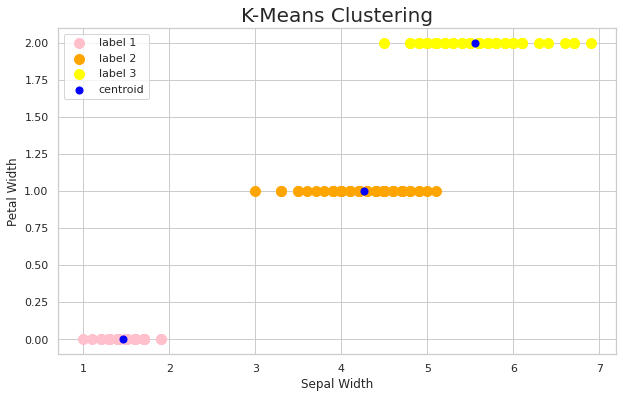

In [120]:
plt.figure(figsize = (10,6))
km = km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 100, c = 'pink', label = 'label 1')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 100, c = 'orange', label = 'label 2')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 100, c = 'yellow', label = 'label 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'blue', label = 'centroid')
plt.title('K-Means Clustering', fontsize = 20)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

**Using Hierarchical Clustering on Sepal Width and Petal Width**

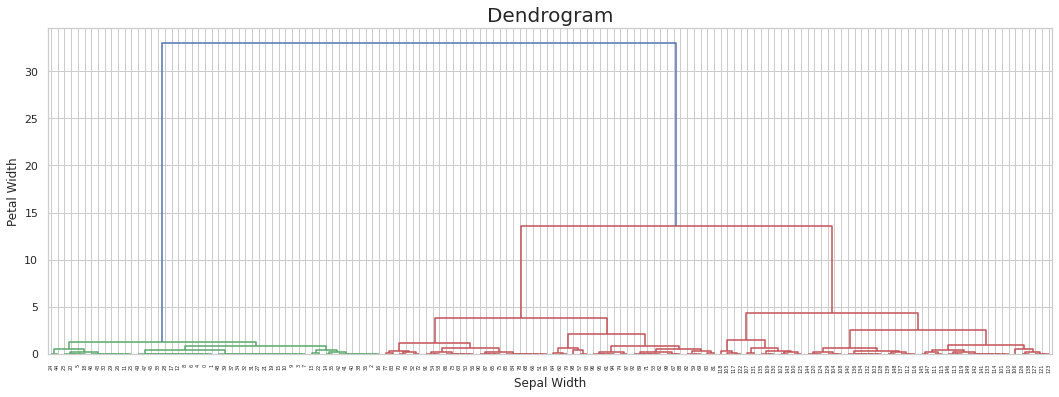

In [121]:
from scipy.cluster import hierarchy as sch

plt.figure(figsize = (18,6))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show()

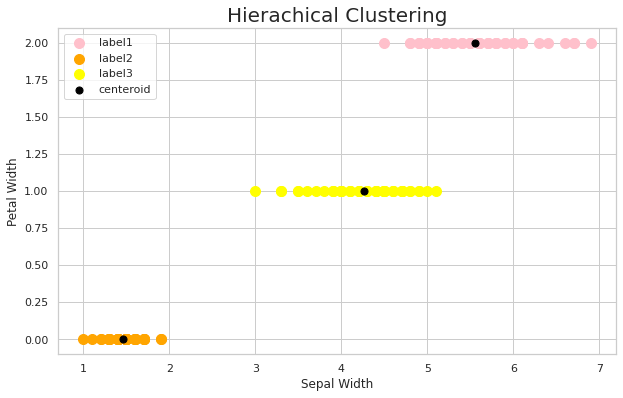

In [122]:
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize = (10,6))
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s = 100, c = 'pink', label = 'label1')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s = 100, c = 'orange', label = 'label2')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s = 100, c = 'yellow', label = 'label3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'black', label = 'centeroid')
plt.title('Hierachical Clustering', fontsize = 20)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()